# Importing libraries

In [1]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
%matplotlib inline

# Loading data

In [2]:
train = pd.read_csv("G:/sem 8/project/implementation/Phising_Training_Dataset.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [3]:
train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
train.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

3921 times -1 repeated in Result
5034 times 1 repeated in Result


<Axes: ylabel='count'>

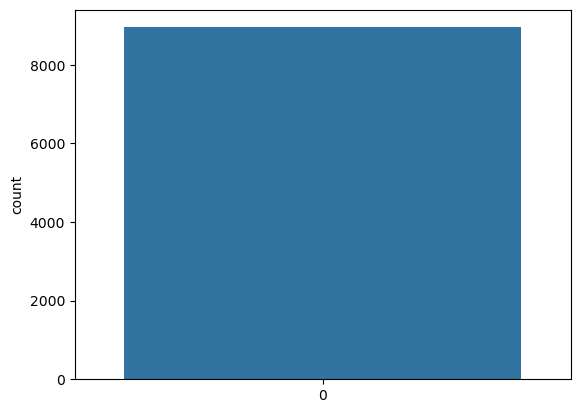

In [5]:
#Looking at the count of phishing and legitmate entries in our training dataset
a=len(train[train.Result==-1])
b=len(train[train.Result==1])
print(a,"times -1 repeated in Result")
print(b,"times 1 repeated in Result")
sns.countplot(train['Result'])

**Note:** From the above countplot the data isn't much imbalanced.

<Axes: >

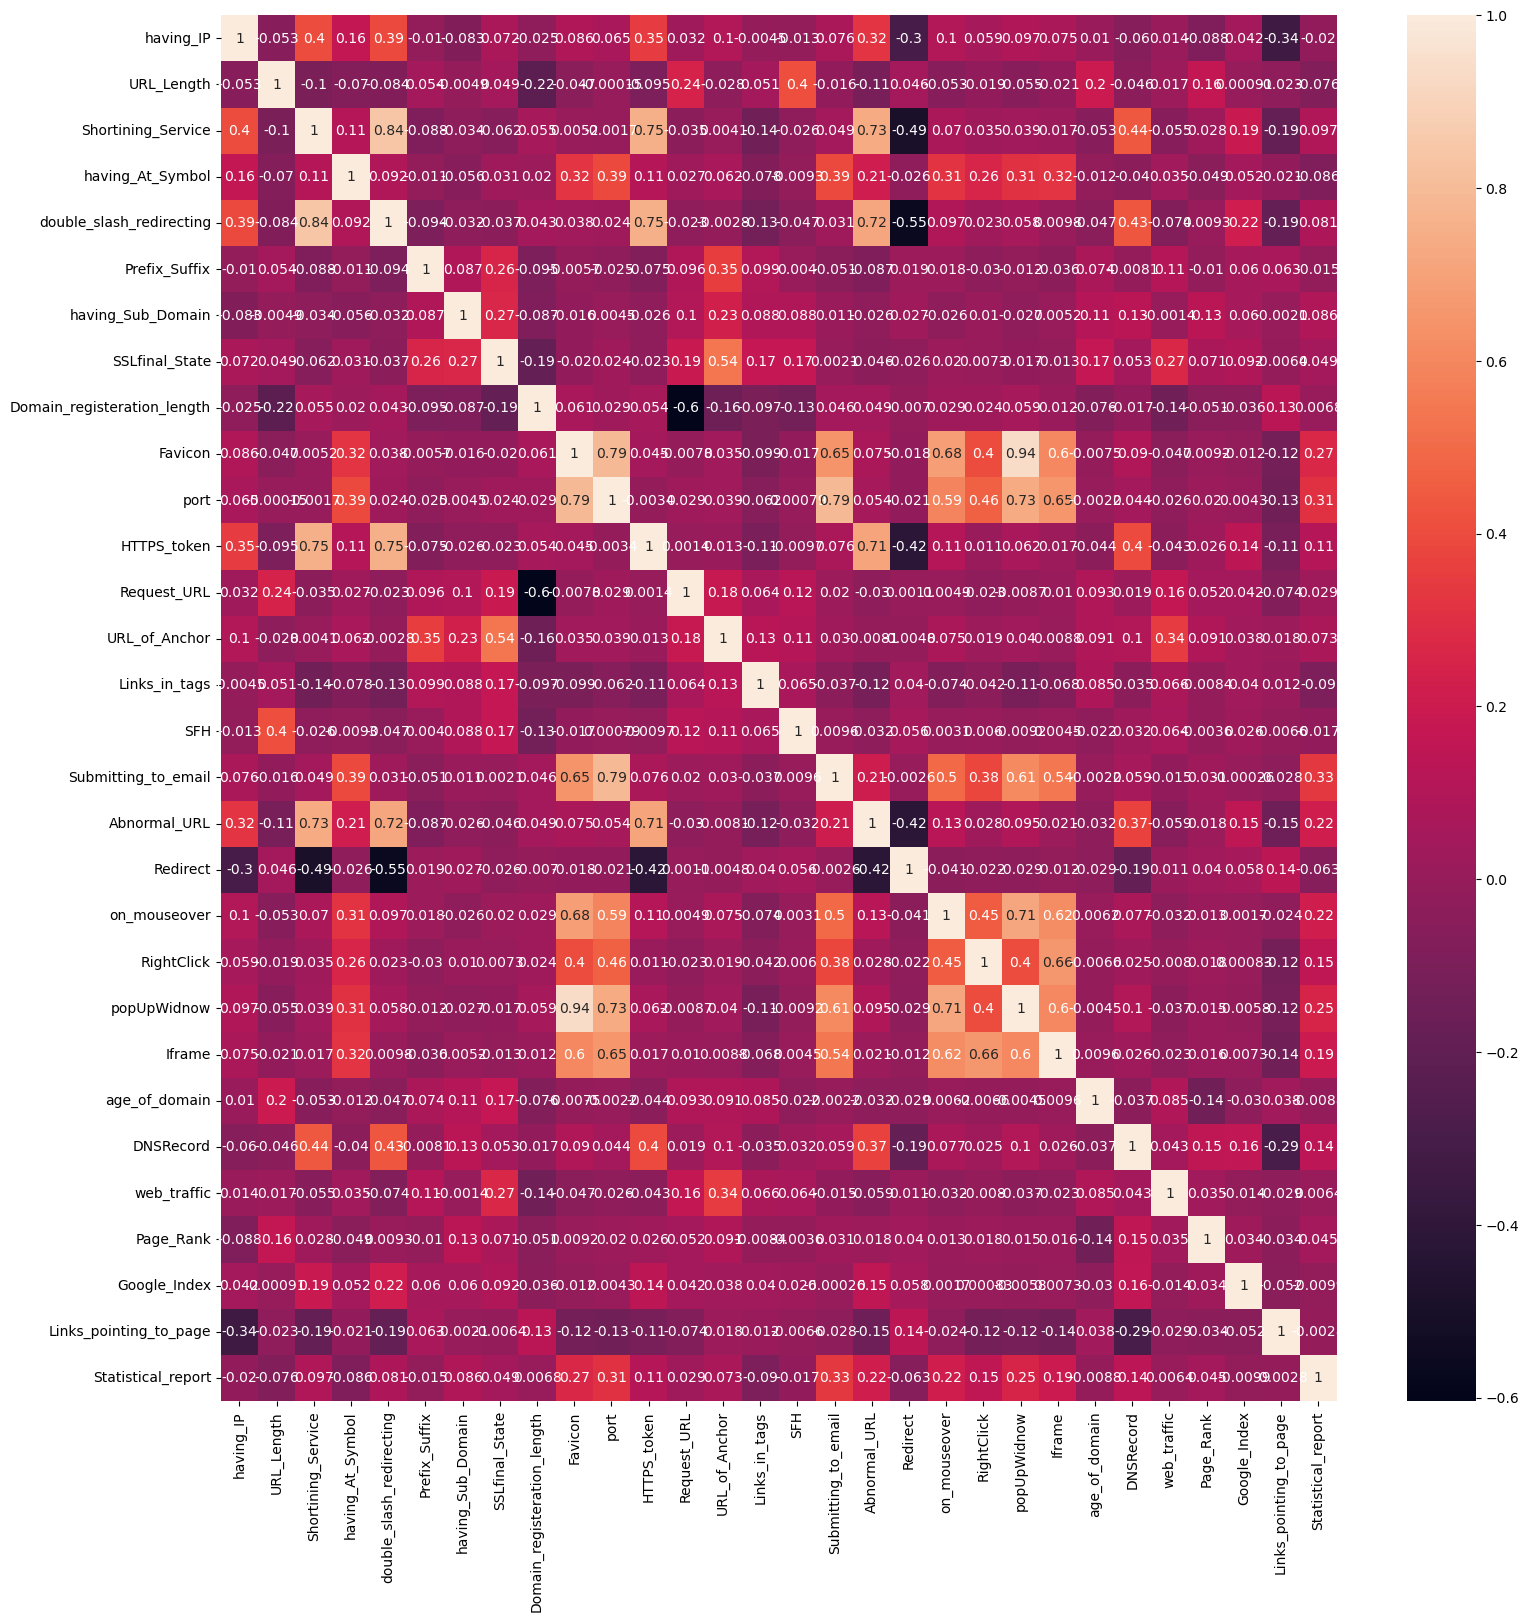

In [6]:
#looking at correlation between each feature
plt.figure(figsize=(18,18))
sns.heatmap(train.drop(['key', 'Result'], axis=1).corr(),annot=True)

<Axes: >

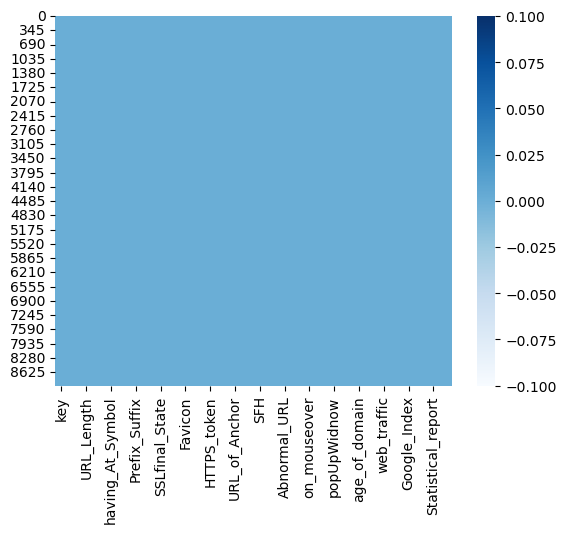

In [7]:
#Looking at the count of null values
sns.heatmap(train.isnull(),cmap='Blues')

Note: The dataset was already cleaned so null values

# Model building

In [8]:
#preparing the data for training
X = train.drop('Result',axis=1).values 
y = train['Result'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
#Testing on the following classifiers
classifiers = [RandomForestClassifier(),
               LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "RandomForest", 1: "Logistic",2: "DecisionTree", 3:"KNN", 4:"SVC"}

In [10]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="f1", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

RandomForest: 0.968853 
Logistic: 0.931652 
DecisionTree: 0.950992 
KNN: 0.649796 
SVC: 0.719113 


We will use Random Forest, Logistic Regression & Decision tree for Voting Classifier

# Model Evaluation

In [11]:
# creating lists of varios scores
precision =[]
recall =[]
f1_scores = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_scores.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [12]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_scores,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["RandomForest", "LogisticRegression", "DecisionTree", "KNeighbours","SVC"])

In [13]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
RandomForest,0.964740,0.973320,0.969011,0.565047,0.561418
LogisticRegression,0.926782,0.950593,0.938537,0.565047,0.561418
DecisionTree,0.951341,0.946640,0.948985,0.565047,0.561418
KNeighbours,0.658421,0.683794,0.670868,0.565047,0.561418
SVC,0.565047,1.000000,0.722083,0.565047,0.561418


# Hard Voting Classifier

In [14]:
#Train the model using training data 
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
Classifier=VotingClassifier(estimators=[('lr',lr),('rf',rf),('dt',dt)],voting='hard')
Classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [15]:
#Test the model using testing data
predictions = Classifier.predict(X_test)

In [16]:
#Test the model using testing data
predictions = Classifier.predict(X_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.960879183704169
Accuracy:  96.09156895589057
Matthews correlation coefficient: 0.9204301859113377


<Axes: >

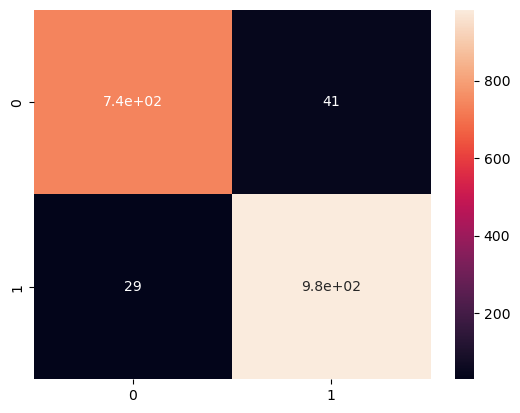

In [17]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

# Soft Voting Classifier

In [18]:
#Train the model using training data 
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
Classifier=VotingClassifier(estimators=[('lr',lr),('rf',rf),('dt',dt)],voting='soft')
Classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [19]:
#Test the model using testing data
predictions = Classifier.predict(X_test)
print("f1 score:",f1_score(y_test,predictions,average='weighted'))
print("Accuracy: ",100.0 *accuracy_score(y_test,predictions))
print("Matthews correlation coefficient:",matthews_corrcoef(y_test,predictions))

f1 score: 0.9586570081236199
Accuracy:  95.86823003908431
Matthews correlation coefficient: 0.9158803588541


<Axes: >

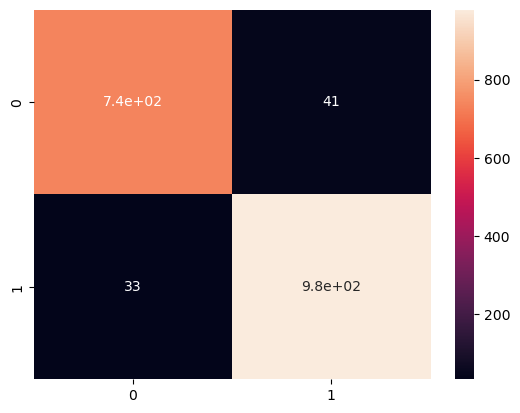

In [20]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

**If you liked this Notebook, please do upvote.**

**Any suggestions or questions, feel free to comment!**

**Best Wishes!**

In [21]:
print(X_test)

[[17283     1    -1 ...     1    -1     1]
 [16730     1    -1 ...     1     0     1]
 [15408     1    -1 ...     1     0     1]
 ...
 [19611     1    -1 ...     1     1     1]
 [18848    -1    -1 ...     1     0     1]
 [16024     1    -1 ...     1     0     1]]


In [25]:
daa = [[12344,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1]]
rf.fit(X_train,y_train)
predict = rf.predict(daa)

In [26]:
print(predict)

[-1]


In [27]:
# !pip install pickle
# import pickle
# pickle.dump(rf, open('model.pkl','wb'))

In [28]:
# !pip install joblib
import joblib
print(joblib.dump(rf,"G:/sem 8/project/implementation/modelfreshvikram"))

['G:/sem 8/project/implementation/modelfreshvikram']
